# Preprocessing Kecelakaan

Anggota:
- Ahmad Danindra Nugroho (5025211259)
- Muhammad Ghifari Taqiuddin (5025211063)
- Raihan Farid (5025201141)
- Talitha Hayyinas Sahala (5025211263)

# Preparations

In [10]:
# Installing dependencies
# Only run once
%pip install gnews nlp-id PySastrawi pillow matplotlib numpy wordcloud pandas

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install --upgrade nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import all dependencies
from nlp_id import tokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Directory for all related files
dataset_dir = '../dataset/'
os.makedirs(dataset_dir, exist_ok=True)

In [3]:
os.listdir(dataset_dir)

['Banjir-2018-2023.csv',
 'Gempa Bumi-2018-2023.csv',
 'Kebakaran-2018-2023.csv',
 'Kecelakaan-2018-2023.csv']

## Loading Dataset

In [4]:
df = pd.read_csv(os.path.join(dataset_dir, 'Kecelakaan-2018-2023.csv'))
df = df.drop(columns=['description' , 'url', 'publisher'])
df['title'] = df['title'].apply(lambda x: x.split(' - ')[0])
df = df[['published date', 'title']]
print(df.shape)
df.head()

(7200, 2)


,published date,title
0,2018-01-01 08:00:00+00:00,CEO Inggris turut tewas dalam kecelakaan pesaw...
1,2018-01-01 08:00:00+00:00,Benarkah Bulan Purnama dan Supermoon Sebabkan ...
2,2018-01-01 08:00:00+00:00,"Kecelakaan di Indrapuri, Korban Mahasiswi Asal..."
3,2018-01-01 08:00:00+00:00,Menguak Alasan Wanita Lebih Rentan Kecelakaan ...
4,2018-01-01 08:00:00+00:00,Dua belas orang tewas dalam kecelakaan pesawat...


## Preprocessing

1. Casefolding: mengubah semua karakter huruf ke huruf kecil
2. Stemming: mengubah suatu kata menjadi bentuk dasarnya (mengatakan -> kata)
3. Tokenization: memecah kalimat menjadi beberapa token
4. Stopwords Removal: memfilter kata yang sering muncul tapi tidak berpengaruh dalam pemrosesan (tergantung umumnya konjungsi, preposisi, pronomina, dsb.)

In [6]:
# 1. Casefolding
df['title'] = df['title'].str.lower()
df.head()

,published date,title
0,2018-01-01 08:00:00+00:00,ceo inggris turut tewas dalam kecelakaan pesaw...
1,2018-01-01 08:00:00+00:00,benarkah bulan purnama dan supermoon sebabkan ...
2,2018-01-01 08:00:00+00:00,"kecelakaan di indrapuri, korban mahasiswi asal..."
3,2018-01-01 08:00:00+00:00,menguak alasan wanita lebih rentan kecelakaan ...
4,2018-01-01 08:00:00+00:00,dua belas orang tewas dalam kecelakaan pesawat...


In [7]:
# 2. Stemming
# Menggunakan stemmer dari library PySastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stem'] = df['title'].apply(stemmer.stem)
df.head()

,published date,title,stem
0,2018-01-01 08:00:00+00:00,ceo inggris turut tewas dalam kecelakaan pesaw...,ceo inggris turut tewas dalam celaka pesawat s...
1,2018-01-01 08:00:00+00:00,benarkah bulan purnama dan supermoon sebabkan ...,benar bulan purnama dan supermoon sebab celaka
2,2018-01-01 08:00:00+00:00,"kecelakaan di indrapuri, korban mahasiswi asal...",celaka di indrapuri korban mahasiswi asal aceh...
3,2018-01-01 08:00:00+00:00,menguak alasan wanita lebih rentan kecelakaan ...,uak alas wanita lebih rentan celaka saat kemudi
4,2018-01-01 08:00:00+00:00,dua belas orang tewas dalam kecelakaan pesawat...,dua belas orang tewas dalam celaka pesawat di ...


In [8]:
# 3. Tokenization
# Menggunakan tokenizer dari library nlp-id
tok = tokenizer.Tokenizer()

# df['tokens'] = df['stem'].apply(tok.tokenize)
df['tokens'] = df['stem'].apply(tok.tokenize)
df.head()

,published date,title,stem,tokens
0,2018-01-01 08:00:00+00:00,ceo inggris turut tewas dalam kecelakaan pesaw...,ceo inggris turut tewas dalam celaka pesawat s...,"[ceo, inggris, turut, tewas, dalam, celaka, pe..."
1,2018-01-01 08:00:00+00:00,benarkah bulan purnama dan supermoon sebabkan ...,benar bulan purnama dan supermoon sebab celaka,"[benar, bulan, purnama, dan, supermoon, sebab,..."
2,2018-01-01 08:00:00+00:00,"kecelakaan di indrapuri, korban mahasiswi asal...",celaka di indrapuri korban mahasiswi asal aceh...,"[celaka, di, indrapuri, korban, mahasiswi, asa..."
3,2018-01-01 08:00:00+00:00,menguak alasan wanita lebih rentan kecelakaan ...,uak alas wanita lebih rentan celaka saat kemudi,"[uak, alas, wanita, lebih, rentan, celaka, saa..."
4,2018-01-01 08:00:00+00:00,dua belas orang tewas dalam kecelakaan pesawat...,dua belas orang tewas dalam celaka pesawat di ...,"[dua, belas, orang, tewas, dalam, celaka, pesa..."


In [9]:
# 4. Stopwords removal
# Menggunakan list stopwords dari library nltk
list_stopwords = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

df['tokens_clean'] = df['tokens'].apply(remove_stopwords)
df.head()

,published date,title,stem,tokens,tokens_clean
0,2018-01-01 08:00:00+00:00,ceo inggris turut tewas dalam kecelakaan pesaw...,ceo inggris turut tewas dalam celaka pesawat s...,"[ceo, inggris, turut, tewas, dalam, celaka, pe...","[ceo, inggris, tewas, celaka, pesawat, sydney]"
1,2018-01-01 08:00:00+00:00,benarkah bulan purnama dan supermoon sebabkan ...,benar bulan purnama dan supermoon sebab celaka,"[benar, bulan, purnama, dan, supermoon, sebab,...","[purnama, supermoon, celaka]"
2,2018-01-01 08:00:00+00:00,"kecelakaan di indrapuri, korban mahasiswi asal...",celaka di indrapuri korban mahasiswi asal aceh...,"[celaka, di, indrapuri, korban, mahasiswi, asa...","[celaka, indrapuri, korban, mahasiswi, aceh, t..."
3,2018-01-01 08:00:00+00:00,menguak alasan wanita lebih rentan kecelakaan ...,uak alas wanita lebih rentan celaka saat kemudi,"[uak, alas, wanita, lebih, rentan, celaka, saa...","[uak, alas, wanita, rentan, celaka, kemudi]"
4,2018-01-01 08:00:00+00:00,dua belas orang tewas dalam kecelakaan pesawat...,dua belas orang tewas dalam celaka pesawat di ...,"[dua, belas, orang, tewas, dalam, celaka, pesa...","[belas, orang, tewas, celaka, pesawat, kosta, ..."


In [10]:
# Gabungkan kembali token pada kolom 'tokens_clean'
df['merged'] = df['tokens_clean'].apply(lambda token: ' '.join(token))
df.head()

,published date,title,stem,tokens,tokens_clean,merged
0,2018-01-01 08:00:00+00:00,ceo inggris turut tewas dalam kecelakaan pesaw...,ceo inggris turut tewas dalam celaka pesawat s...,"[ceo, inggris, turut, tewas, dalam, celaka, pe...","[ceo, inggris, tewas, celaka, pesawat, sydney]",ceo inggris tewas celaka pesawat sydney
1,2018-01-01 08:00:00+00:00,benarkah bulan purnama dan supermoon sebabkan ...,benar bulan purnama dan supermoon sebab celaka,"[benar, bulan, purnama, dan, supermoon, sebab,...","[purnama, supermoon, celaka]",purnama supermoon celaka
2,2018-01-01 08:00:00+00:00,"kecelakaan di indrapuri, korban mahasiswi asal...",celaka di indrapuri korban mahasiswi asal aceh...,"[celaka, di, indrapuri, korban, mahasiswi, asa...","[celaka, indrapuri, korban, mahasiswi, aceh, t...",celaka indrapuri korban mahasiswi aceh tamiang...
3,2018-01-01 08:00:00+00:00,menguak alasan wanita lebih rentan kecelakaan ...,uak alas wanita lebih rentan celaka saat kemudi,"[uak, alas, wanita, lebih, rentan, celaka, saa...","[uak, alas, wanita, rentan, celaka, kemudi]",uak alas wanita rentan celaka kemudi
4,2018-01-01 08:00:00+00:00,dua belas orang tewas dalam kecelakaan pesawat...,dua belas orang tewas dalam celaka pesawat di ...,"[dua, belas, orang, tewas, dalam, celaka, pesa...","[belas, orang, tewas, celaka, pesawat, kosta, ...",belas orang tewas celaka pesawat kosta rika


# Drop Useless Data

In [11]:
df.drop(df[df['title'] == 'video'].index, inplace=True)

In [27]:
df[df['stem'].str.contains('celaka')]

,published date,title,stem,tokens,tokens_clean,merged
0,2018-01-01 08:00:00+00:00,ceo inggris turut tewas dalam kecelakaan pesaw...,ceo inggris turut tewas dalam celaka pesawat s...,"[ceo, inggris, turut, tewas, dalam, celaka, pe...","[ceo, inggris, tewas, celaka, pesawat, sydney]",ceo inggris tewas celaka pesawat sydney
1,2018-01-01 08:00:00+00:00,benarkah bulan purnama dan supermoon sebabkan ...,benar bulan purnama dan supermoon sebab celaka,"[benar, bulan, purnama, dan, supermoon, sebab,...","[purnama, supermoon, celaka]",purnama supermoon celaka
2,2018-01-01 08:00:00+00:00,"kecelakaan di indrapuri, korban mahasiswi asal...",celaka di indrapuri korban mahasiswi asal aceh...,"[celaka, di, indrapuri, korban, mahasiswi, asa...","[celaka, indrapuri, korban, mahasiswi, aceh, t...",celaka indrapuri korban mahasiswi aceh tamiang...
3,2018-01-01 08:00:00+00:00,menguak alasan wanita lebih rentan kecelakaan ...,uak alas wanita lebih rentan celaka saat kemudi,"[uak, alas, wanita, lebih, rentan, celaka, saa...","[uak, alas, wanita, rentan, celaka, kemudi]",uak alas wanita rentan celaka kemudi
4,2018-01-01 08:00:00+00:00,dua belas orang tewas dalam kecelakaan pesawat...,dua belas orang tewas dalam celaka pesawat di ...,"[dua, belas, orang, tewas, dalam, celaka, pesa...","[belas, orang, tewas, celaka, pesawat, kosta, ...",belas orang tewas celaka pesawat kosta rika
...,...,...,...,...,...,...
7194,2023-12-28 08:00:00+00:00,"kecelakaan di tol layang mbz, lalin tersendat ...",celaka di tol layang mbz lalin sendat jelang k...,"[celaka, di, tol, layang, mbz, lalin, sendat, ...","[celaka, tol, layang, mbz, lalin, sendat, jela...",celaka tol layang mbz lalin sendat jelang km 33
7195,2023-12-29 08:00:00+00:00,4.127 nyawa melayang di jalan akibat kecelakaa...,4 127 nyawa layang di jalan akibat celaka di j...,"[4, 127, nyawa, layang, di, jalan, akibat, cel...","[4, 127, nyawa, layang, jalan, akibat, celaka,...",4 127 nyawa layang jalan akibat celaka jateng ...
7196,2023-12-30 08:00:00+00:00,"kecelakaan maut di tol solo-ngawi, mobil beris...",celaka maut di tol solo-ngawi mobil isi satu k...,"[celaka, maut, di, tol, solo-ngawi, mobil, isi...","[celaka, maut, tol, solo-ngawi, mobil, isi, ke...",celaka maut tol solo-ngawi mobil isi keluarga ...
7197,2023-12-30 08:00:00+00:00,kronologi kecelakaan di jalan siliwangi rawalu...,kronologi celaka di jalan siliwangi rawalumbu ...,"[kronologi, celaka, di, jalan, siliwangi, rawa...","[kronologi, celaka, jalan, siliwangi, rawalumb...",kronologi celaka jalan siliwangi rawalumbu onl...


In [21]:
num = df.loc[1999, 'tokens_clean']
print(num)

['truk', 'muat', 'cair', 'kimia', 'celaka', 'tol', 'magetan', 'sang', 'sopir', 'tewas']


In [16]:
pip install pyahocorasick

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import ahocorasick

# Define the keywords
keywords = ["celaka"]

# Create an Aho-Corasick automaton
automaton = ahocorasick.Automaton()

# Add the keywords to the automaton
for keyword in keywords:
    automaton.add_word(keyword, keyword)

# Build the automaton
automaton.make_automaton()

# Filter out rows that do not contain the keywords
filtered_df = df[df['stem'].apply(lambda x: any(keyword in word.lower() for _, word in automaton.iter(x.lower())))].reset_index(drop=True)

# Print the filtered DataFrame
print(filtered_df)

                 published date  \
0     2018-01-01 08:00:00+00:00   
1     2018-01-01 08:00:00+00:00   
2     2018-01-01 08:00:00+00:00   
3     2018-01-01 08:00:00+00:00   
4     2018-01-01 08:00:00+00:00   
...                         ...   
6536  2023-12-28 08:00:00+00:00   
6537  2023-12-29 08:00:00+00:00   
6538  2023-12-30 08:00:00+00:00   
6539  2023-12-30 08:00:00+00:00   
6540  2023-12-31 08:00:00+00:00   

                                                  title  \
0     ceo inggris turut tewas dalam kecelakaan pesaw...   
1     benarkah bulan purnama dan supermoon sebabkan ...   
2     kecelakaan di indrapuri, korban mahasiswi asal...   
3     menguak alasan wanita lebih rentan kecelakaan ...   
4     dua belas orang tewas dalam kecelakaan pesawat...   
...                                                 ...   
6536  kecelakaan di tol layang mbz, lalin tersendat ...   
6537  4.127 nyawa melayang di jalan akibat kecelakaa...   
6538  kecelakaan maut di tol solo-ngawi, mobil b

## Visualisasi WordCloud

Pembanding data antara sebelum dan setelah dilakukan pra-pemrosesan

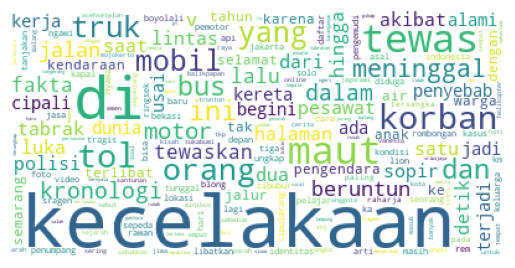

In [29]:
text_before = ' '.join(filtered_df['title'].tolist())
wordcloud_before = WordCloud(background_color='white', collocations=False).generate(text_before)

plt.imshow(wordcloud_before)
plt.axis("off")
plt.show()

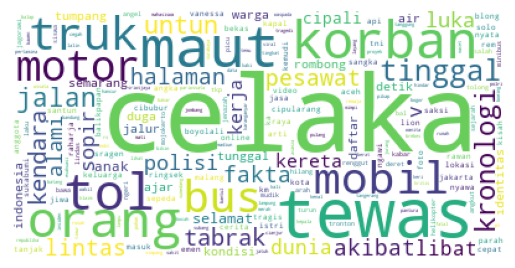

In [30]:
text_after = ' '.join(filtered_df['merged'])
wordcloud_after = WordCloud(background_color='white', collocations=False).generate(text_after)

plt.imshow(wordcloud_after)
plt.axis("off")
plt.show()

In [31]:
# Simpan output ke dalam CSV
filtered_df.to_csv('Kecelakaan-2018-2023-pre.csv', index=False)